# Исследование продаж компьютерных игр

Из открытых источников доступны исторические данные до 2016 года о продажах игр, оценки пользователей и экспертов, жанры и платформы. Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

## Общая информация о данных

In [1]:
# импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [2]:
try:
    data = pd.read_csv('games.csv')
except:
    data = pd.read_csv('/datasets/games.csv')
# вывод первых срок для ознакомления
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [3]:
#общая информация
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


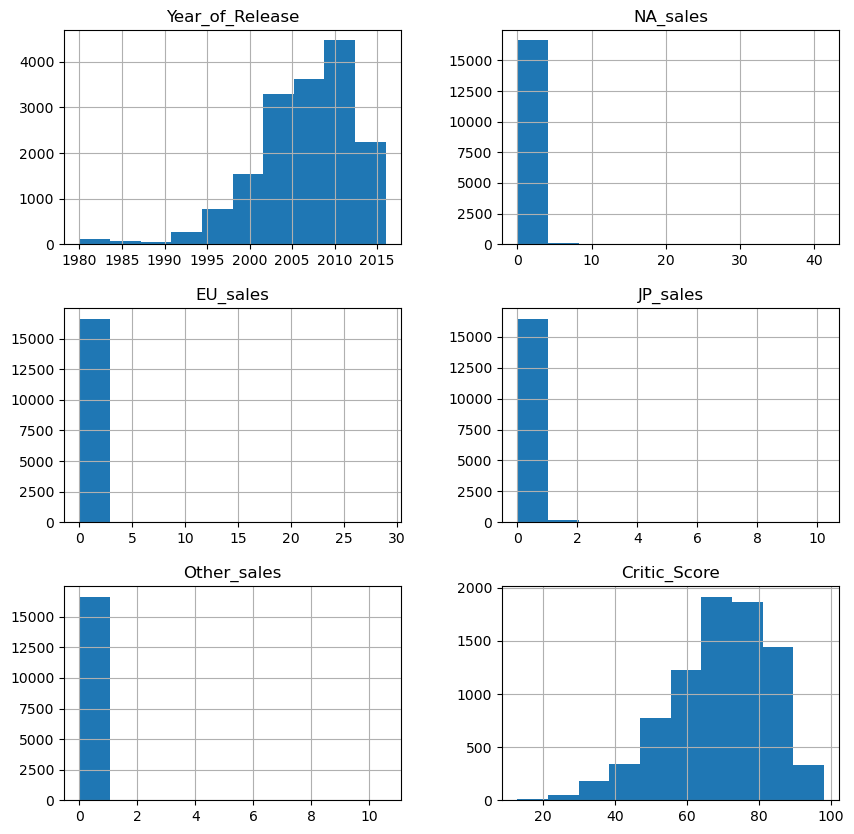

In [4]:
# построение гистограмм для всех столбцов с числовыми данными
data.hist(figsize=(10, 10));

In [5]:
# проверим датафрейм на наличие явных дубликатов
data.duplicated().sum()

0

На основе первых гистограмм можно сделать первичные выводы:
- больше всего игр было выпущено в период с 2002 по 2012 годы
- основная оценка критиков колеблется в районе 65-80 баллов.

Типичное количество продаж игр по регионам:
- Северная Америка - до 4 млн копий
- Европа - до 3 млн копий
- Япония - до 1 млн копий
- другие страны - до 1 млн копий.

Присутствуют аномально высокие значения продаж во всех регионах.

Присутствуют пропуски в столбцах:
- `'Name'`
- `'Year_of_Release'`
- `'Genre'`
- `'Critic_Score'`
- `'User_Score'`
- `'Rating'`.

Явных дубликатов не обнаружено.

Необходимо:
- привести названия столбцов к стандартному виду
- обработать пропуски там, где это возможно
- в столбце `'User_Score'` изменить тип данных со строкового на числовой.

## Предобработка данных

Приведём названия столбцов к нижнему регистру.

In [6]:
data.columns = data.columns.str.lower()
#проверка
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [7]:
# выведем количество пропусков во всех столбцах
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [8]:
# уникальные значения оценок пользователей
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [9]:
# уникальные значения оценок критиков
data['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

Чтобы не потерять данные, заменим пропуски в столбцах `'user_score'`, а также значение `'tbd'` (to be determined - подлежит уточнению, оценка пользователей ещё не объявлена) на значение 11. Это позволит привести столбец к числовому типу и производить математические операции в дальнейшем исследовании. Для этого в дальнейшем срезом исключим значения 11.

С той же целью промаркируем пропуски в столбце `'critic_score'` значением 101.

Пропуски в этих столбцах могли возникнуть из-за того, что по каким-то играм нет оценок пользователей и критиков, или из-за ошибки в выгрузке/загрузке данных.

In [10]:
data['user_score'] = data['user_score'].fillna(11)
data.loc[data['user_score'] == 'tbd', 'user_score'] = 11
#проверка
data['user_score'].unique()

array(['8', 11, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

In [11]:
data['critic_score'] = data['critic_score'].fillna(101)
#проверка
data['critic_score'].unique()

array([ 76., 101.,  82.,  80.,  89.,  58.,  87.,  91.,  61.,  97.,  95.,
        77.,  88.,  83.,  94.,  93.,  85.,  86.,  98.,  96.,  90.,  84.,
        73.,  74.,  78.,  92.,  71.,  72.,  68.,  62.,  49.,  67.,  81.,
        66.,  56.,  79.,  70.,  59.,  64.,  75.,  60.,  63.,  69.,  50.,
        25.,  42.,  44.,  55.,  48.,  57.,  29.,  47.,  65.,  54.,  20.,
        53.,  37.,  38.,  33.,  52.,  30.,  32.,  43.,  45.,  51.,  40.,
        46.,  39.,  34.,  35.,  41.,  36.,  28.,  31.,  27.,  26.,  19.,
        23.,  24.,  21.,  17.,  22.,  13.])

Приведём данные в столбцах `'user_score'` и `'critic_score'` к числовому типу данных.

In [12]:
data['user_score'] = data['user_score'].astype('float')
#проверка
data['user_score'].dtype

dtype('float64')

In [13]:
data['critic_score'] = data['critic_score'].astype('int')
#проверка
data['critic_score'].dtype

dtype('int32')

Заполним пропуски в столбце `'year_of_release'` нулями, чтобы не потерять целевые данные.

Пропуски могут быть обусловлены ошибкой в выгрузке/загрузке данных, отсутствием информации о дате выхода игры.

In [14]:
data['year_of_release'].isna().sum()

269

In [15]:
data['year_of_release'] = data['year_of_release'].fillna(0)
#проверка
data['year_of_release'].isna().sum()

0

Переведём данные в столбце 'year_of_release' из вещественного в целочисленный тип данных, так как года представляют собой целые числа.

In [16]:
data['year_of_release'].dtype

dtype('float64')

In [17]:
data['year_of_release'] = data['year_of_release'].astype('int')
#проверка
data['year_of_release'].dtype

dtype('int32')

Заполним пропуски в столбце `'name'` прочерками. Так же поступим со столбцом `'genre'`. 

Пропуски в этих данных могли возникнуть из-за ошибки в заполнении данных, загрузке/выгрузке.

In [18]:
data['name'] = data['name'].fillna('-')
data['name'].isna().sum()

0

In [19]:
data['genre'] = data['genre'].fillna('-')
data['genre'].isna().sum()

0

In [20]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Промаркируем пропуски в столбце `'rating'` прочерком, так как все игры уникальны и сложно предугадать их возрастные ограничения, основываясь на данных других игр. Возможно, рейтинг этих игр не был и не будет выявлен, либо возникла ошибка в выгрузке/загрузке данных.

In [21]:
data['rating'] = data['rating'].fillna('-')
data['rating'].isna().sum()

0

Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.

In [22]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,101,11.0,-,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,101,11.0,-,31.38


**Вывод:** Все необходимые пропуски заполненны, типы данных заменены на корректные.

## Исследовательский анализ данных

### Распределение по годам

Посмотрим, сколько игр выпускалось в разные годы.

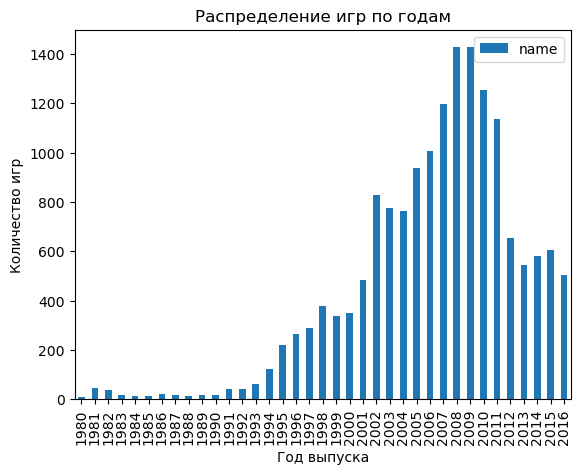

In [23]:
# распределение игр по годам, отфильтруем пропуски в year_of_release(значение 0)
(
    data
    .pivot_table(index='year_of_release', values='name', aggfunc='count')
    .query('year_of_release > 0')
    .plot(y='name', kind='bar')
)
plt.title('Распределение игр по годам')
plt.xlabel('Год выпуска')
plt.ylabel('Количество игр');

До 2000 года выпускалось не более 400 игр в год. Далее начинается активный рост с максимумом в 2008-2009 годах в районе 1400 игр. Далее идёт спад до 500-600 игр в год в 2012-2016 годах. 

### Распределение продаж по платформам и годам

In [24]:
# распределение платформ по суммарным продажам
sales_platform = (
    data
    .pivot_table(index='platform', values='total_sales', aggfunc='sum')
    .sort_values(by='total_sales', ascending=False)
    .head(10)
)
sales_platform

,total_sales
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12
PS,730.86
GBA,317.85
PS4,314.14
PSP,294.05


In [25]:
# выведем топ платформ по суммарным продажам более 700 млн
top = sales_platform.query('total_sales > 700').index.tolist()
top

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']

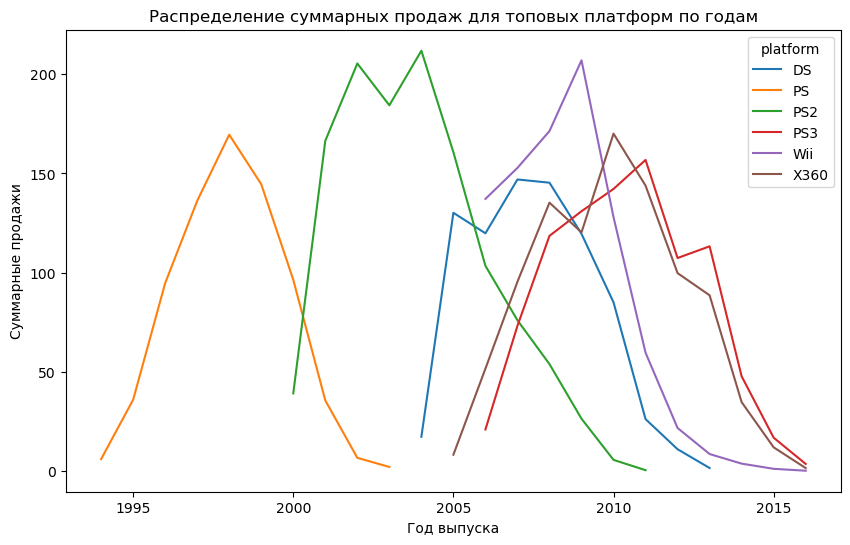

In [26]:
# распределение продаж по годам для топа платформ
# группировка суммарных продаж по платформам и годам
data_group = data.groupby(['platform', 'year_of_release'], as_index=False)['total_sales'].sum()
# отфильтруем топовые платформы и годы для более корректного графика
data_top = data_group.query('year_of_release > 1990 and platform in @top')
plt.figure(figsize=(10, 6))
ax = sns.lineplot(data=data_top, x='year_of_release', y='total_sales', hue='platform')
ax.set_title('Распределение суммарных продаж для топовых платформ по годам')
ax.set(xlabel='Год выпуска', ylabel='Суммарные продажи');

Примерный срок жизни одной платформы 7-10 лет. Новые платформы появляются каждые 1-6 лет.

За актуальный период примем 2013-2015 годы, так как распределение игр здесь равномерное, без сильных скачков, и этот период наиболее близок к 2017 году. Также в этот период не входят неактуальные платформы, игры для которых уже не выпускаются. 2016 год исключим, так как данные за этот год могут быть неполными.

### Лидеры продаж в актуальном периоде

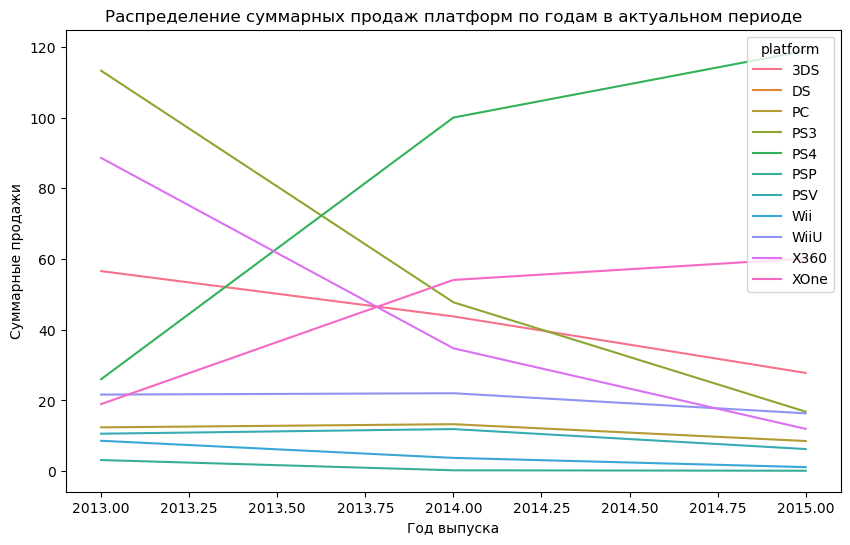

In [27]:
# отсеим данные для актуального периода 2013-2015 годы
data_new = data.query('year_of_release >= 2013 and year_of_release <= 2015')
# сгруппируем данные по платформам и годам и просуммируем продажи
data_new_group = data_new.groupby(['platform', 'year_of_release'], as_index=False)['total_sales'].sum()
# построим график распределения суммарных продаж по годам
plt.figure(figsize=(10, 6))
ax = sns.lineplot(data=data_new_group, x='year_of_release', y='total_sales', hue='platform')
ax.set_title('Распределение суммарных продаж платформ по годам в актуальном периоде')
ax.set(xlabel='Год выпуска', ylabel='Суммарные продажи');

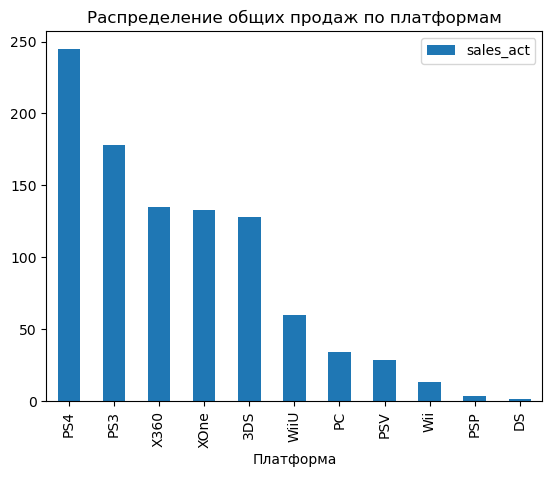

In [28]:
# отсортируем распределение общих продаж платформ в порядке убывания для выявления топа платформ
# найдём распределение продаж платформ по годам
data_new_pivot = (
    data_new
    .pivot_table(index='platform', columns='year_of_release', values='total_sales', aggfunc='sum')
)
# просуммируем все продажи каждой платформы
data_new_pivot['sales_act'] = data_new_pivot.sum(axis=1)
# построим распределение общих продаж по платформам
ax = data_new_pivot.sort_values('sales_act', ascending=False).plot(y='sales_act', kind='bar')
ax.set_title('Распределение общих продаж по платформам')
ax.set_xlabel('Платформа');

In [29]:
# выберем топ платформ с суммарными продажами более 100 млн
new_top = data_new_pivot.query('sales_act > 100').index.tolist()
new_top

['3DS', 'PS3', 'PS4', 'X360', 'XOne']

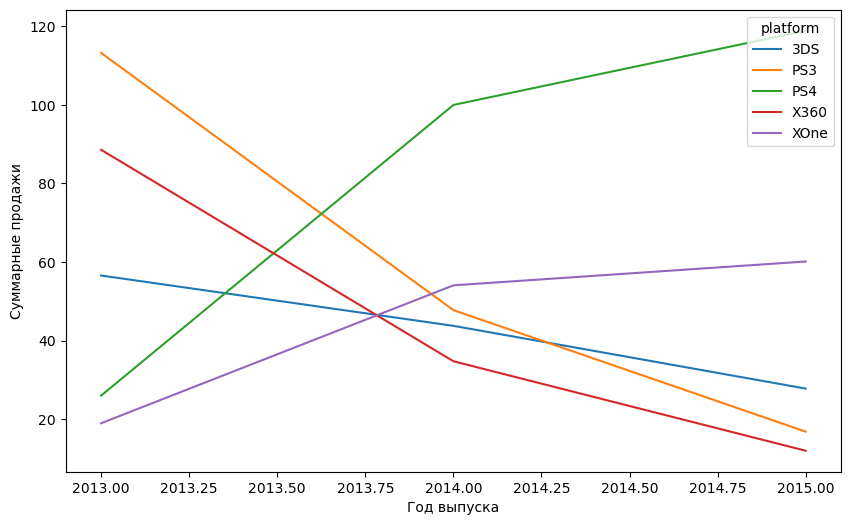

In [30]:
# посмотрим, как менялись продажи игр на платформах из топа в актуальном периоде
data_new_top = (
    data_new
    .groupby(['platform', 'year_of_release'], as_index=False)['total_sales'].sum()
    .query('platform in @new_top')
)
plt.figure(figsize=(10, 6))
ax = sns.lineplot(data=data_new_top, x='year_of_release', y='total_sales', hue='platform')
ax.set_label('Продажи для топовых платформ за актуальный период')
ax.set_xlabel('Год выпуска')
ax.set_ylabel('Суммарные продажи');

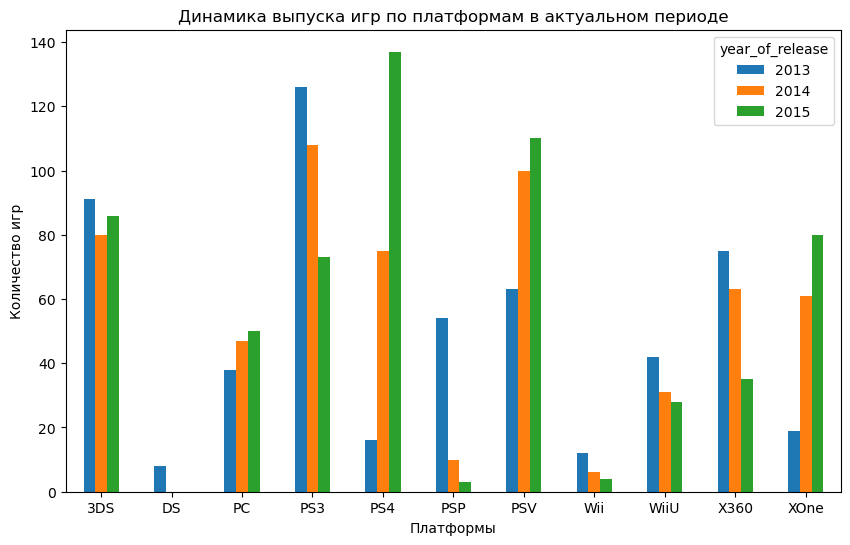

In [31]:
# динамика выпуска игр по платформам в актуальном периоде
(
    data_new
    .pivot_table(index='platform', columns='year_of_release', values='name', aggfunc='count')
    .plot(kind='bar', figsize=(10, 6))
)
plt.title('Динамика выпуска игр по платформам в актуальном периоде')
plt.xlabel('Платформы')
plt.ylabel('Количество игр')
plt.xticks(rotation=0);

Лидеры по продажам за 2013-2015 год:
- 3DS
- PS3
- PS4
- X360
- XOne.


Из перечисленных платформ продажи растут у PS4 и XOne - более новых моделей приставок. Продажи остальных платформ падают.

Потенциально прибыльные платформы:
- 3DS (продажи стабильны)
- PC (не самые высокие, но стабильные продажи)
- PS3 (высокие продажи, идущие на спад в связи с выпуском новой версии приставки)
- PS4 (высокие продажи, стремительный рост - новая приставка)
- PSV (растущие высокие продажи)
- X360 (высокие продажи, идущие на спад в связи с выпуском новой версии приставки)
- XOne (растущие продажи, новая приставка).

Примем, что `PS4` и `XOne` - две потенциально наиболее прибыльные платформы, так как они актуальны и продажи игр для них набирают обороты.

### «Ящик с усами» по глобальным продажам игр в разбивке по платформам

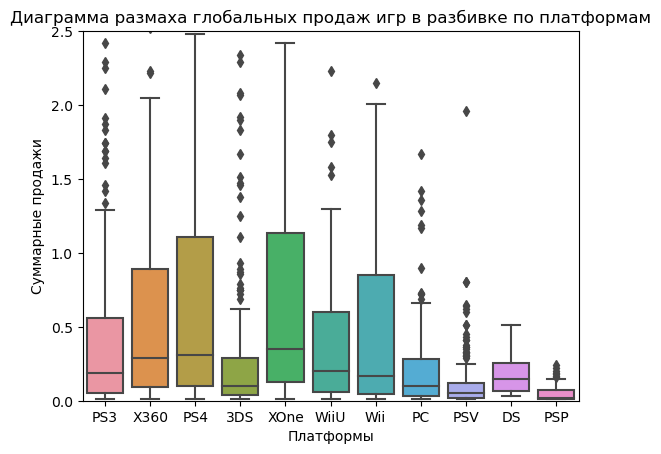

In [32]:
ax = sns.boxplot(data=data_new, x="platform", y="total_sales")
# ограничим ось y
plt.ylim(0, 2.5)
ax.set_title('Диаграмма размаха глобальных продаж игр в разбивке по платформам')
ax.set_xlabel('Платформы')
ax.set_ylabel('Суммарные продажи');

In [33]:
# выведем числовое описание данных
data_new.groupby('platform')['total_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,257.0,0.498482,1.431660,0.01,0.0400,0.100,0.2900,14.60
DS,8.0,0.192500,0.172026,0.03,0.0675,0.150,0.2525,0.51
PC,135.0,0.253185,0.399785,0.01,0.0300,0.100,0.2850,3.05
PS3,307.0,0.579251,1.530432,0.01,0.0500,0.190,0.5600,21.05
PS4,228.0,1.074079,1.899788,0.01,0.0975,0.310,1.1050,14.63
PSP,67.0,0.052239,0.059768,0.01,0.0150,0.020,0.0700,0.24
PSV,273.0,0.105275,0.171310,0.01,0.0200,0.050,0.1200,1.96
Wii,22.0,0.612727,0.932412,0.01,0.0425,0.165,0.8525,3.58
WiiU,101.0,0.594356,1.098038,0.01,0.0600,0.200,0.6000,7.09


Медианные значения находятся в диапазоне от 0.02 до 0.35 млн. Основное распределение продаж находится в диапазоне до 2.5 млн. Половина всех продаж по каждой платформе находится в диапазоне от 0.015 до 1.14 млн. Присутствует большое количество выбросов с высокими продажами - выход особо популярных игр. Максимум годовых продаж среди всех платформ принадлежит PS3.

### Зависимость между отзывами и продажами

Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.

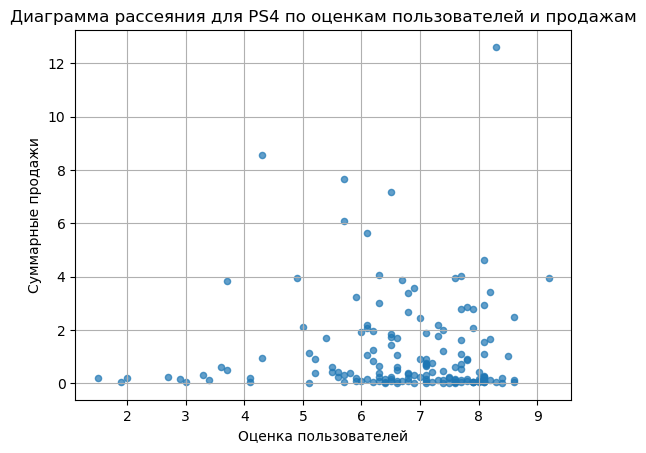

In [34]:
# построим диаграмму рассеяния для PS4 по оценкам пользователей и продажам
# отсечём промаркированные пропуски в user_score
data_PS4_user = data_new.query('platform == "PS4" and user_score <= 10')
ax = data_PS4_user.plot(x='user_score', y='total_sales', kind='scatter', grid=True, alpha=0.7)
ax.set_title('Диаграмма рассеяния для PS4 по оценкам пользователей и продажам')
ax.set_xlabel('Оценка пользователей')
ax.set_ylabel('Суммарные продажи');

In [35]:
# посчитаем коэффициент корреляции оценки пользователей и суммарных продаж для PS4
data_PS4_user['user_score'].corr(data_PS4_user['total_sales'])

0.024230832360622557

Корреляция между оценкой пользователей и продажами очень слабая. Но при значении оценки не ниже 5 присутствует небольшое количество более высоких продаж.

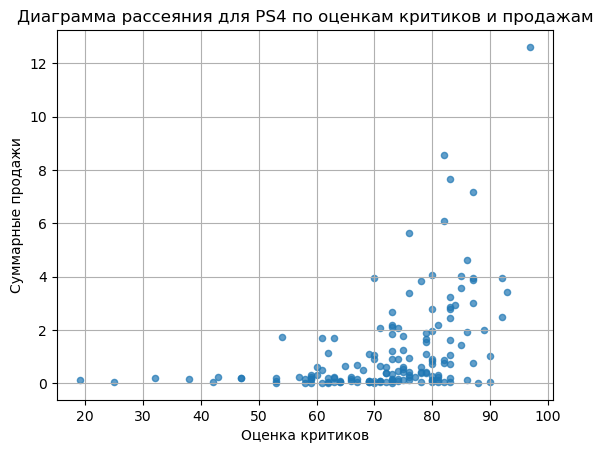

In [36]:
# построим диаграмму рассеяния для PS4 по оценкам критиков и продажам
# отберём промаркированные пропуски в critic_score
data_PS4_critic = data_new.query('platform == "PS4" and critic_score <= 100')
ax = data_PS4_critic.plot(x='critic_score', y='total_sales', kind='scatter', grid=True, alpha=0.7)
ax.set_title('Диаграмма рассеяния для PS4 по оценкам критиков и продажам')
ax.set_xlabel('Оценка критиков')
ax.set_ylabel('Суммарные продажи');

In [37]:
# посчитаем коэффициент корреляции оценки критиков и суммарных продаж для PS4
data_PS4_critic['critic_score'].corr(data_PS4_critic['total_sales'])

0.4318482049982005

Присутствует слабая положительная корреляция между оценкой критиков и продажами.

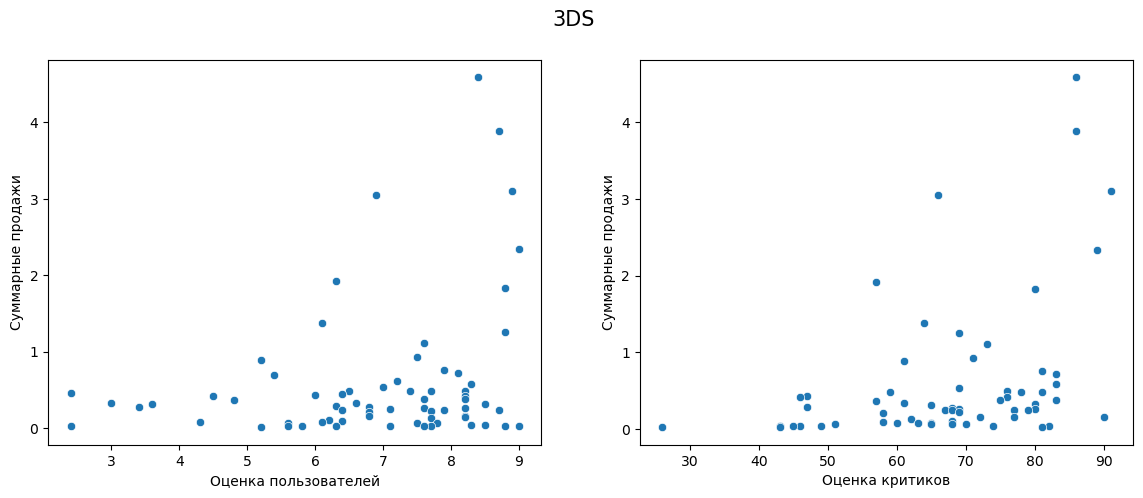

Для платформы 3DS
Корреляция продаж и оценки пользователей: 0.2647112067029276
Корреляция продаж и оценки критиков: 0.3843260045745225



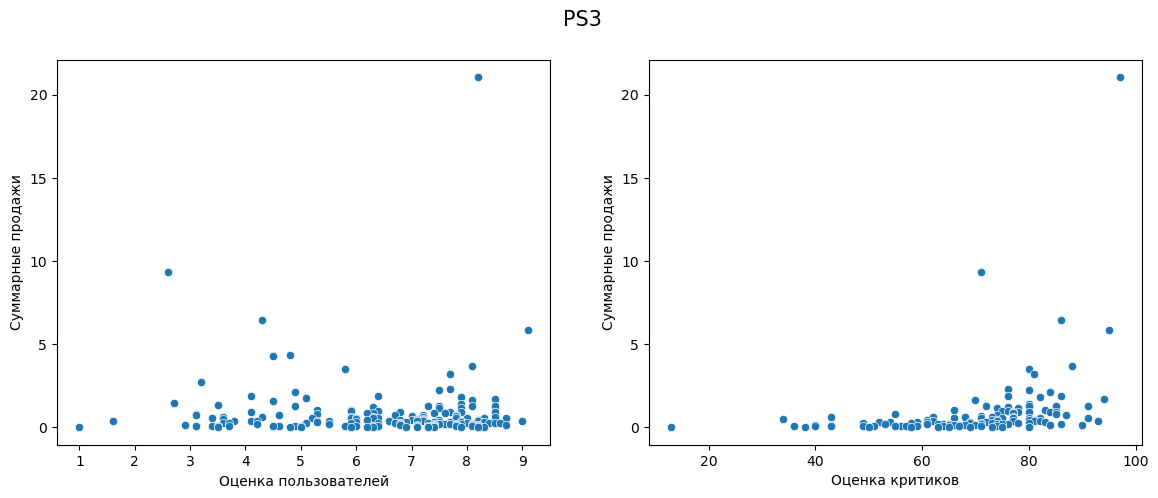

Для платформы PS3
Корреляция продаж и оценки пользователей: -0.01633272834351343
Корреляция продаж и оценки критиков: 0.3342853393371919



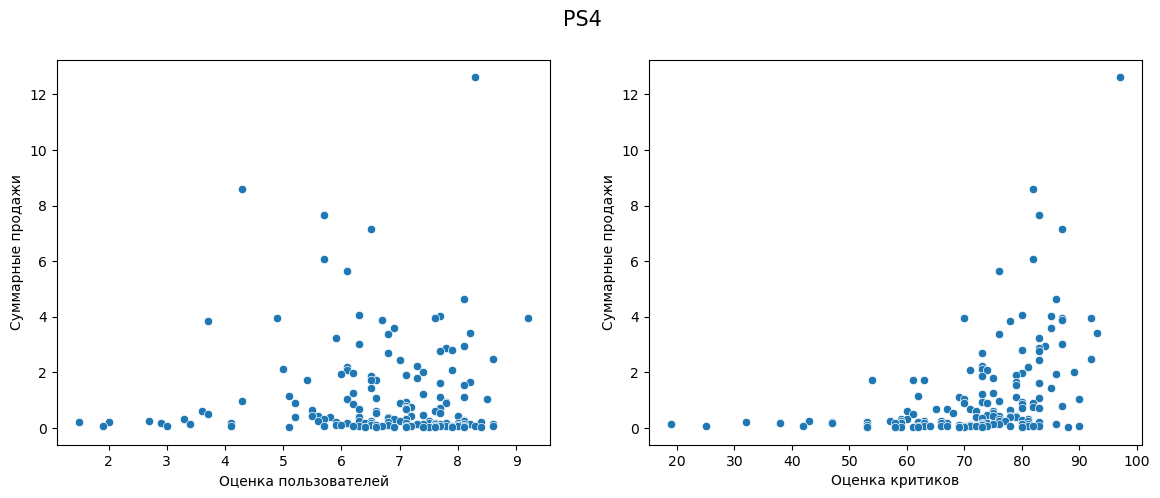

Для платформы PS4
Корреляция продаж и оценки пользователей: 0.024230832360622553
Корреляция продаж и оценки критиков: 0.4318482049982005



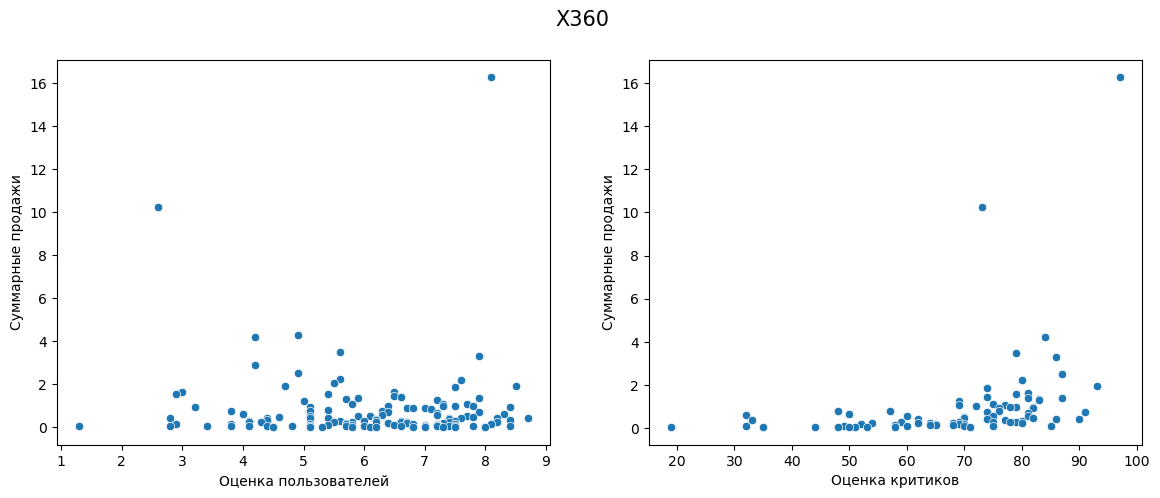

Для платформы X360
Корреляция продаж и оценки пользователей: -0.034562454100238206
Корреляция продаж и оценки критиков: 0.3503445460228664



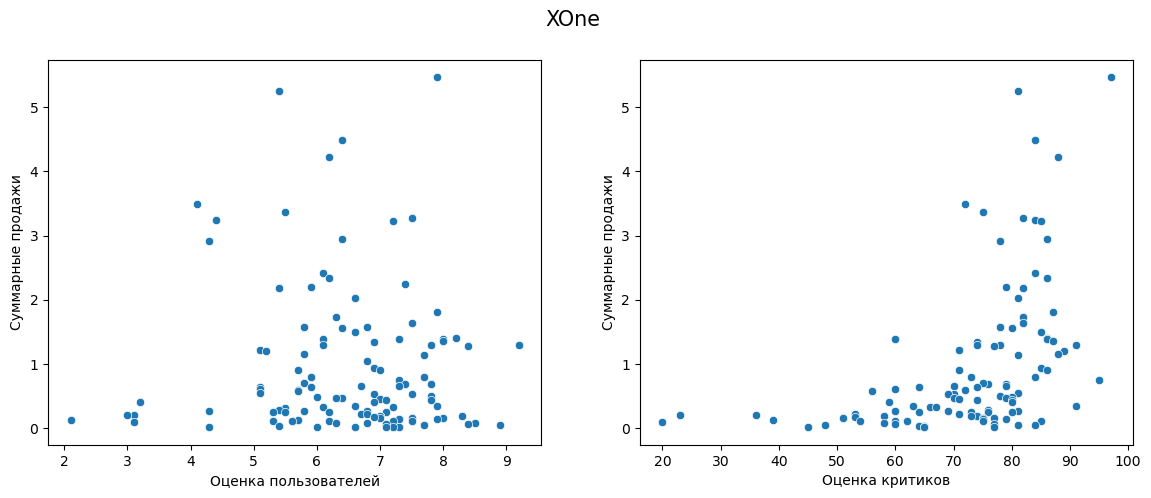

Для платформы XOne
Корреляция продаж и оценки пользователей: -0.03926828544552199
Корреляция продаж и оценки критиков: 0.4593845680707106



In [38]:
# напишем функцию для построения диаграмм рассеяния и рассчёта коэффициента корреляции для остальных платформ из топа
def platform_corr(pl):
    # фильтр платформы и промаркированных пропусков в user_score и critic_score
    data_pl_user = data_new.loc[(data['platform'] == pl) & (data['user_score'] <= 10)]
    data_pl_critic = data_new.loc[(data['platform'] == pl) & (data['critic_score'] <= 100)]
    # задаём размер графика
    fig, ax = plt.subplots(1, 2, figsize=(14, 5))
    # диаграммы рассеяния суммарных продаж и оценки пользователей / критиков
    sns.scatterplot(x='user_score', y='total_sales', data=data_pl_user, ax=ax[0])
    sns.scatterplot(x='critic_score', y='total_sales', data=data_pl_critic, ax=ax[1])
    # вывод названия платформы
    fig.suptitle(pl, fontsize=15)
    # подписи осей
    ax[0].set_xlabel('Оценка пользователей')
    ax[1].set_xlabel('Оценка критиков')
    ax[0].set_ylabel('Суммарные продажи')
    ax[1].set_ylabel('Суммарные продажи')
    plt.show()
    # рассчёт коэффициентов корреляции
    print('Для платформы', pl)
    print('Корреляция продаж и оценки пользователей:', data_pl_user['total_sales'].corr(data_pl_user['user_score']))
    print('Корреляция продаж и оценки критиков:', data_pl_critic['total_sales'].corr(data_pl_critic['critic_score']))
    print()
    
# применим функцию для топа платформ    
for pl in new_top:
    platform_corr(pl)

**Вывод:** Зависимость продаж от оценок пользователей и критиков низкая. Но оценка критиков влияет на продажи несколько сильнее, чем оценка пользователей.

Для платформы 3DS оценка пользователей имеет более сильное влияние на продажи в сравнении с другими платформами.

### Рапределение игр по жанрам

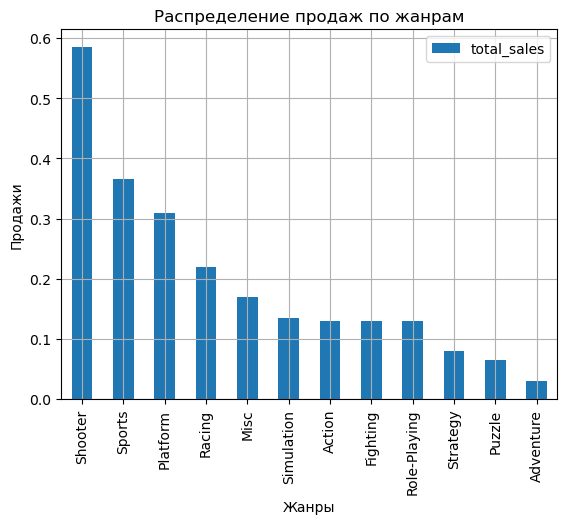

In [39]:
# построим общее распределение продаж по жанрам
(
    data_new
    .pivot_table(index='genre', values='total_sales', aggfunc='median')
    .sort_values('total_sales', ascending=False)
    .plot(y='total_sales', kind='bar', grid=True)
)
plt.title('Распределение продаж по жанрам')
plt.xlabel('Жанры')
plt.ylabel('Продажи');

Самыми прибыльными жанрами являются:
- Shooter
- Sports
- Platform
- Racing.

Наименее прибыльными жанрами являются Strategy, Puzzle и Adventure.

## Составьте портрет пользователя каждого региона

### Топ платформ по регионам

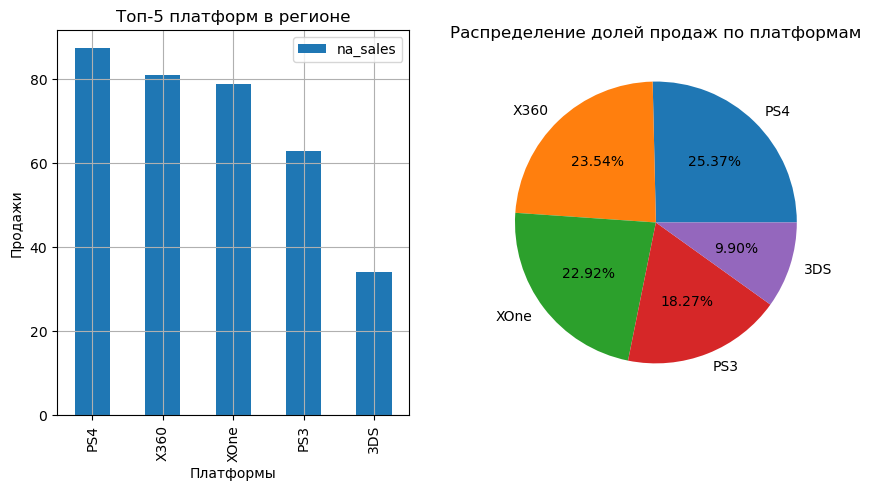

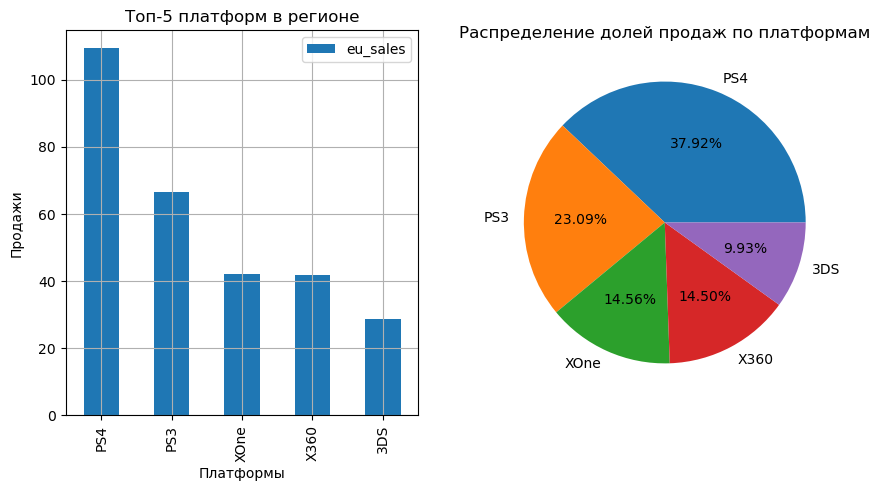

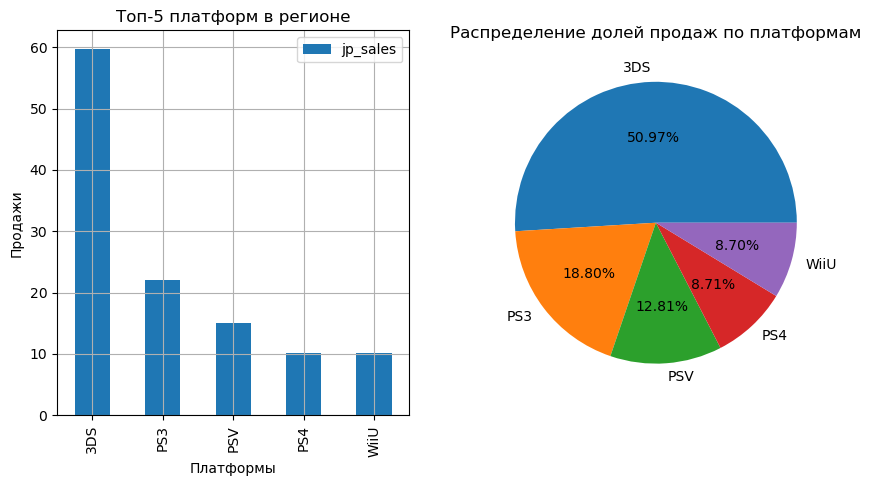

In [40]:
# список столбцов с продажами в регионах
regions = ['na_sales', 'eu_sales', 'jp_sales']

# напишем цикл с перебором регионов для построения распределения продаж по платформам
for region in regions:
    data_region_platform = (
        data_new
        .pivot_table(index='platform', values=region, aggfunc='sum')
        .sort_values(region, ascending=False)
    )
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    # диаграмма распределения продаж по платформам
    data_region_platform.head().plot(y=region, kind='bar', grid=True, ax=ax[0])
    ax[0].set_title('Топ-5 платформ в регионе')
    ax[0].set_xlabel('Платформы')
    ax[0].set_ylabel('Продажи')
    # диаграмма распределения долей продаж по платформам
    data_region_platform.head().plot(y=region, kind='pie', grid=True, legend=False, autopct = '%.2f%%', ax=ax[1])
    ax[1].set_title('Распределение долей продаж по платформам')
    ax[1].set_ylabel('');

В топ-5 Северной Америки входят американские и японские платформы, возглавляет топ японский PlayStation 4.

В топе Европы также находятся консоли американского и японского производства, но на первых местах японские приставки PlayStation.

В топе Японии присутствуют приставки только родного производителя.

Всё это объясняется тем, что отечественные приставки стоят дешевле, чем приставки иностранного производства.

### Топ жанров по регионам

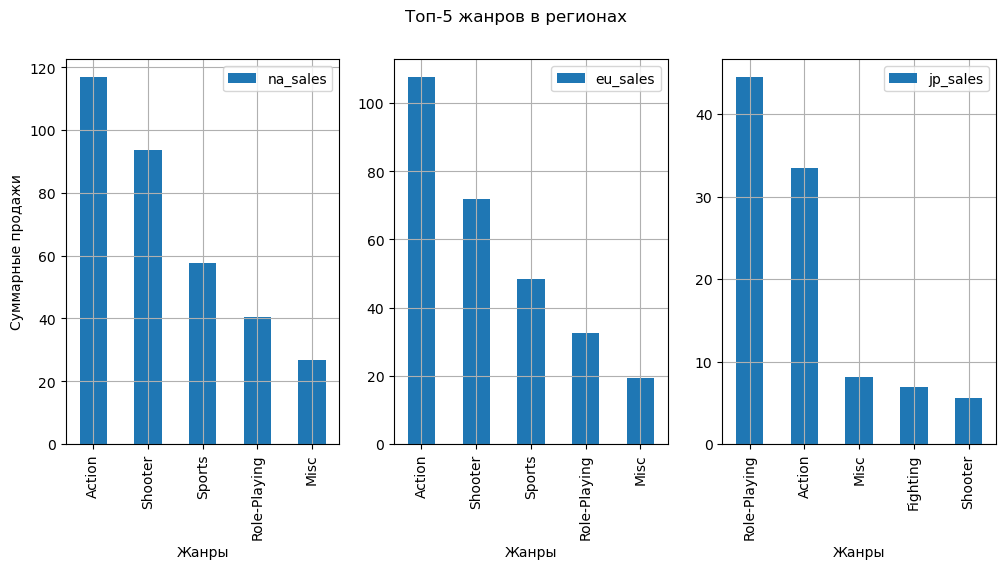

In [41]:
fig, ax = plt.subplots(1, 3, figsize=(12, 5))
n=0
fig.suptitle('Топ-5 жанров в регионах')
# напишем цикл с перебором регионов для построения распределения продаж по жанрам
for region in regions:
    (
        data_new
        .pivot_table(index='genre', values=region, aggfunc='sum')
        .sort_values(region, ascending=False)
        .head()
        .plot(y=region, kind='bar', grid=True, ax=ax[n])
    )
    ax[n].set_xlabel('Жанры')
    ax[0].set_ylabel('Суммарные продажи')
    n = n + 1;

В Северной Америке и Европе идентичное распределение жанров. В Японии жанр Role-Playing становится более популярным, чем в других регионах, а также в топе появляется жанр Fighting.

Различие в распределении жанров объясняется различием западной (Северная Америка и Европа) и восточной (Япония) культур.

### Влияние рейтинга ESRB на продажи в отдельном регионе

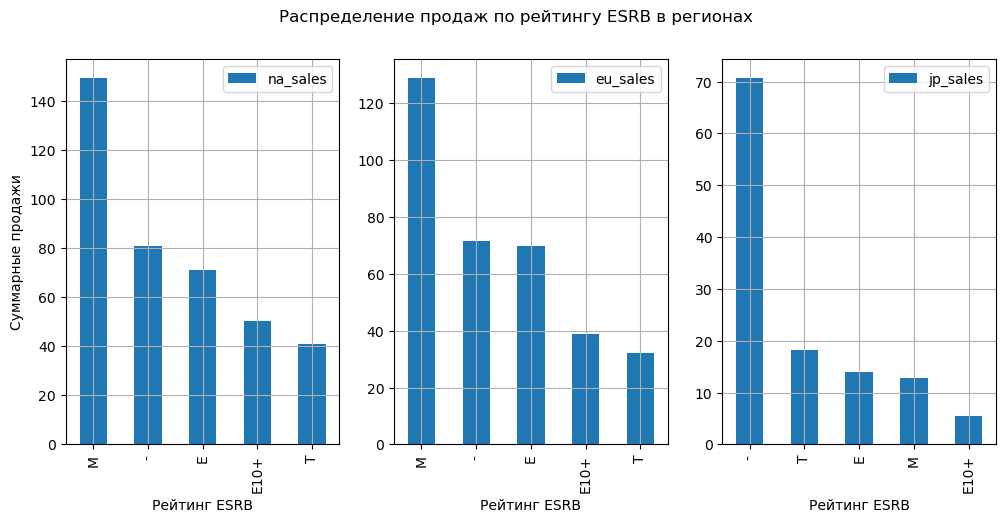

In [42]:
fig, ax = plt.subplots(1, 3, figsize=(12, 5))
n=0
fig.suptitle('Распределение продаж по рейтингу ESRB в регионах')
# напишем цикл с перебором регионов для построения распределения продаж по рейтингу ESRB
for region in regions:
    (
        data_new
        .pivot_table(index='rating', values=region, aggfunc='sum')
        .sort_values(region, ascending=False)
        .plot(y=region, kind='bar', grid=True, ax=ax[n])
    )
    ax[n].set_xlabel('Рейтинг ESRB')
    ax[0].set_ylabel('Суммарные продажи')
    n+=1;

В Северной Америке и Европе с большим отрывом чаще всего приобретают игры для лиц старше 17 лет. Далее следуют игры без рейтинга, 0+, 10+ и 13+.

В Японии распределение выглядит иначе. Наиболее популярны игры без рейтинга, далее с большим отрывом отстают игры категорий  13+, 0+, 17+ и 10+. Рейтинг ESRB не влияет на продажи игр в Японии, так как ESRB действует на территории США и Канады и на японские игры не распространяется.

**Вывод:**

Типичный потрет пользователя из Северной Америки:
- имеет приставку Xbox 360
- любит жанр "экшен"
- предпочитает игры с возрастным ограничением 17+.

Типичный портрет пользователя из Европы:
- имеет приставку Sony PlayStation 4
- любит жанр "экшен"
- предпочитает игры с возрастным ограничением 17+.

Типичный портрет пользователя из Японии:
- имеет портативную консоль Nintendo 3DS
- любит компьютерные ролевые игры
- рейтинг ESRB не влияет на выбор игры.

## Проверка гипотез

Проверка гипотезы: средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
```
H_0: Средний пользовательский рейтинг платформы Xbox One = средний пользовательский рейтинг PC
H_a: средний пользовательский рейтинг платформы Xbox One ≠ средний пользовательский рейтинг PC
alpha = 0.05
```

In [43]:
# results = вызов метода для проверки гипотезы
results = st.ttest_ind(
    data_new.query('platform == "XOne" and user_score <= 10')['user_score'],
    data_new.query('platform == "PC" and user_score <= 10')['user_score'],
    equal_var=False
)
# alpha = значение уровня значимости
alpha = 0.05

# вывод значения p-value на экран 
print(results.pvalue)
# условный оператор с выводом строки с ответом
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

0.2867036680187632
Не получилось отвергнуть нулевую гипотезу


Проверка гипотезы: средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
```
H_0: Средний пользовательский рейтинг жанра Action = средний пользовательский рейтинг жанра Sports
H_a: Средний пользовательский рейтинг жанра Action ≠ средний пользовательский рейтинг жанра Sports
alpha = 0.05
```

In [44]:
# results = вызов метода для проверки гипотезы
results = st.ttest_ind(
    data_new.query('user_score <= 10 and genre == "Action"')['user_score'],
    data_new.query('user_score <= 10 and genre == "Sports"')['user_score'],
    equal_var=False
)
# alpha = значение уровня значимости
alpha = 0.05

# вывод значения p-value на экран 
print(results.pvalue)
# условный оператор с выводом строки с ответом
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

3.5076737062533423e-19
Отвергаем нулевую гипотезу


Нулевые гипотезы сформулированы так, чтобы был использован знак равенства между сравниваемыми значениями. Альтернативные гипотезы - двусторонние - различия могут быть как в большую, так и в меньшую стороны.

Критерий для проверки гипотез: если вероятность того, что средние двух генеральных совокупностей равны, меньше уровня статистической значимости alpha, есть основания отвергнуть нулевую гипотезу.

**Вывод:**
- не получилось отвергнуть гипотезу о равенстве средних пользовательских рейтингов платформ Xbox One и PC
- отвергнута гипотеза о равенстве средних пользовательских рейтингов жанров Action и Sports.

## Общий вывод

В ходе исследовательского и статистического анализа данных были выявлены следующие закономерности:

1. Примерный срок жизни одной платформы 7-10 лет. Новые платформы появляются каждые 1-6 лет.


2. Лидеры по суммарным продажам за полный период:
- PlayStation 2
- Xbox 360
- PlayStation 3
- Wii
- Nintendo DS
- PlayStation.

3. Выявлен актуальный период для прогнозирования продаж в 2017 году - `с 2013 по 2015 годы`.


4. Лидеры по продажам за актуальный период:
- Nintendo 3DS
- PlayStation 3
- PlayStation 4
- Xbox 360
- Xbox One.

Потенциально прибыльные платформы:
- Nintendo 3DS (продажи стабильны)
- PC (не самые высокие, но стабильные продажи)
- PlayStation 3 (высокие продажи, идущие на спад в связи с выпуском новой версии приставки)
- PlayStation 4 (высокие продажи, стремительный рост - новая приставка)
- PlayStation Vita (растущие высокие продажи)
- Xbox 360 (высокие продажи, идущие на спад в связи с выпуском новой версии приставки)
- Xbox One (растущие продажи, новая приставка).

Из перечисленных платформ продажи растут у `PlayStation 4` и `Xbox One` (более новых моделей приставок) - это две потенциально наиболее прибыльные платформы.


5. Медианные значения глобальных продаж игр в разбивке по платформам находятся в диапазоне от 0.02 до 0.35 млн. Основное распределение продаж находится в диапазоне до 2.5 млн. Половина всех продаж по каждой платформе находится в диапазоне от 0.015 до 1.14 млн. Присутствует большое количество выбросов с высокими продажами - выход особо популярных игр. Максимум годовых продаж среди всех платформ принадлежит `PlayStation 3`.


6. Зависимость продаж от оценок пользователей и критиков низкая. Но оценка критиков влияет на продажи несколько сильнее, чем оценка пользователей. Для платформы `Nintendo 3DS` оценка пользователей имеет более сильное влияние на продажи в сравнении с другими платформами.


7. Самыми прибыльными жанрами являются:
- Shooter
- Sports
- Platform
- Racing.

Наименее прибыльными жанрами являются Strategy, Puzzle и Adventure.


8. Топ-5 платформ в Северной Америке:
- PlayStation 4
- Xbox 360
- Xbox One
- PlayStation 3
- Nintendo 3DS.

Топ-5 платформ в Европе:
- PlayStation 4
- PlayStation 3
- Xbox One
- Xbox 360
- Nintendo 3DS.

Топ-5 платформ в Японии:
- Nintendo 3DS
- PlayStation 3
- PlayStation Vita
- PlayStation 4
- Wii U.

В топ-5 Северной Америки входят американские и японские платформы, возглавляет топ японский PlayStation 4.

В топе Европы также находятся консоли американского и японского производства, но на первых местах японские приставки PlayStation.

В топе Японии присутствуют приставки только родного производителя.

Всё это объясняется тем, что отечественные приставки стоят дешевле, чем приставки иностранного производства.



9. Топ-5 жанров в Северной Америке:
- Action
- Shooter
- Sports
- Role-Playing
- Misc.

Топ-5 жанров в Европе:
- Action
- Shooter
- Sports
- Role-Playing
- Misc.

Топ-5 жанров в Японии:
- Role-Playing
- Action
- Misc
- Fighting
- Shooter.


В Северной Америке и Европе идентичное распределение жанров. В Японии жанр Role-Playing становится более популярным, чем в других регионах, а также в топе появляется жанр Fighting.

Различие в распределении жанров объясняется различием западной (Северная Америка и Европа) и восточной (Япония) культур.


10. В Северной Америке и Европе с большим отрывом чаще всего приобретают игры для лиц старше 17 лет. Далее следуют игры без рейтинга, 0+, 10+ и 13+.

В Японии распределение выглядит иначе. Наиболее популярны игры без рейтинга, далее с большим отрывом отстают игры категорий  13+, 0+, 17+ и 10+. Рейтинг ESRB не влияет на продажи игр в Японии, так как ESRB действует на территории США и Канады и на японские игры не распространяется.


11. Типичный потрет пользователя из Северной Америки:
- имеет приставку `Xbox 360`
- любит жанр `"экшен"`
- предпочитает игры с возрастным ограничением 17+.

Типичный портрет пользователя из Европы:
- имеет приставку `PlayStation 4`
- любит жанр `"экшен"`
- предпочитает игры с возрастным ограничением 17+.

Типичный портрет пользователя из Японии:
- имеет портативную консоль `Nintendo 3DS`
- любит `компьютерные ролевые игры`
- рейтинг ESRB не важен.


12. Высока вероятность равенства средних пользовательских рейтингов платформ `Xbox One` и `PC`, так как не получилось отвергнуть гипотезу об их равенстве.


13. Высока вероятность различия средних пользовательских рейтингов жанров `Action` и `Sports`, так как гипотеза об их равенстве была отвергнута.